In [60]:
import torch
#print(torch.__version__)
from transformers import BertTokenizer, BertModel
import tqdm as notebook_tqdm
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [5]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [49]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [36]:
corpus = [
    "Natural language processing is a subfield of artificial intelligence.",
    "Topic modeling is used to discover hidden topics in text data.",
    "The location of the hotel was perfect, right in the heart of the city.",
    "The bed was comfortable, and I had a good night's sleep.",
    "The check-in process was quick and efficient."
]


## Trying to understand tokenization and outputs

In [107]:
# Encode the corpus
encoded_corpus = tokenizer(corpus, padding=True, truncation=True, return_tensors="pt")

In [108]:
print(encoded_corpus)

{'input_ids': tensor([[  101,  3019,  2653,  6364,  2003,  1037,  4942,  3790,  1997,  7976,
          4454,  1012,   102,     0,     0,     0,     0,     0],
        [  101,  8476, 11643,  2003,  2109,  2000,  7523,  5023,  7832,  1999,
          3793,  2951,  1012,   102,     0,     0,     0,     0],
        [  101,  1996,  3295,  1997,  1996,  3309,  2001,  3819,  1010,  2157,
          1999,  1996,  2540,  1997,  1996,  2103,  1012,   102],
        [  101,  1996,  2793,  2001,  6625,  1010,  1998,  1045,  2018,  1037,
          2204,  2305,  1005,  1055,  3637,  1012,   102,     0],
        [  101,  1996,  4638,  1011,  1999,  2832,  2001,  4248,  1998,  8114,
          1012,   102,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [56]:
# Pass the encoded input through the BERT model to get embeddings
with torch.no_grad():
    outputs = model(**encoded_corpus)
    hidden_states = outputs[2]
    torch_hidden_states = np.array(hidden_states)
    print(torch_hidden_states.shape)
   

(13, 5, 18, 768)


In [51]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output', 'hidden_states'])

In [52]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 5
Number of tokens: 18
Number of hidden units: 768


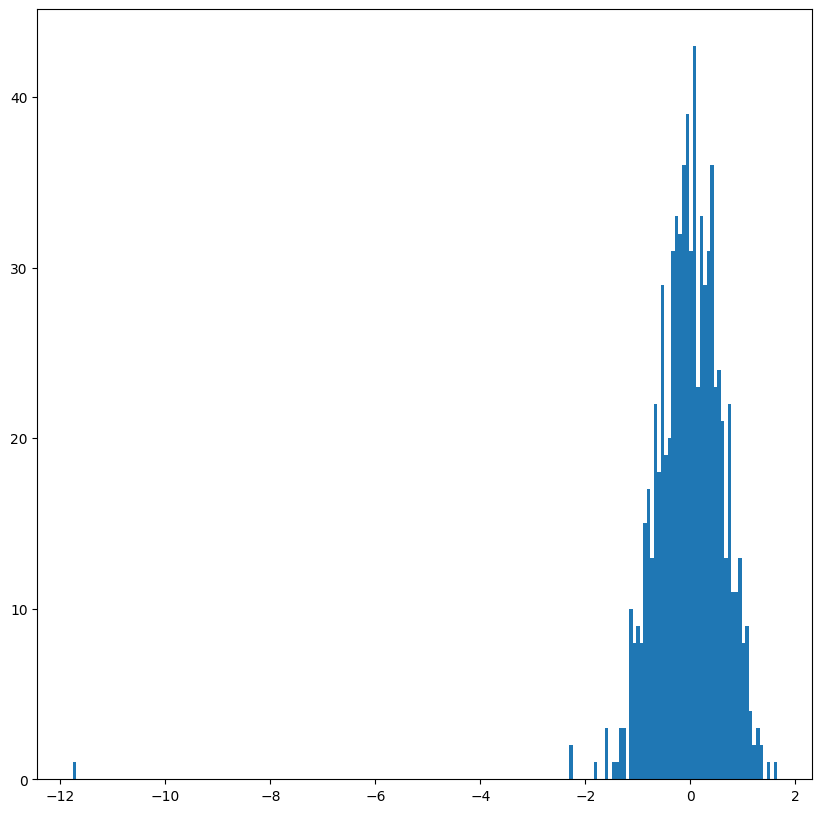

In [61]:

# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [63]:
hidden_states

(tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
          [ 0.4644,  0.2837, -0.5461,  ...,  0.1824, -0.1935, -1.1974],
          [ 0.0409,  0.3889, -0.8691,  ..., -0.1293,  0.0436, -0.3818],
          ...,
          [ 0.0091, -0.1711,  0.0139,  ...,  0.4235, -0.4467,  0.3228],
          [-0.1078, -0.2791, -0.1519,  ...,  0.3430, -0.4528,  0.1790],
          [ 0.0477, -0.3958, -0.0554,  ...,  0.5040, -0.6640,  0.0589]],
 
         [[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
          [ 0.0540,  0.6501,  1.2248,  ...,  0.7399,  0.4977, -1.0681],
          [-0.0529,  0.4265, -0.5910,  ...,  0.1585,  0.1236, -0.4244],
          ...,
          [ 0.0091, -0.1711,  0.0139,  ...,  0.4235, -0.4467,  0.3228],
          [-0.1078, -0.2791, -0.1519,  ...,  0.3430, -0.4528,  0.1790],
          [ 0.0477, -0.3958, -0.0554,  ...,  0.5040, -0.6640,  0.0589]],
 
         [[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
          [-0.4367,  0.5360,

In [64]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([5, 18, 768])


In [129]:
hidden_states[0][0]

tensor([[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
        [-0.4367,  0.5360, -0.0514,  ..., -0.0397,  0.6783, -0.5318],
        [ 0.6114, -0.3187,  0.0966,  ...,  0.3327,  0.9919, -0.1853],
        ...,
        [-0.1274, -0.4593,  0.0020,  ...,  0.1607, -0.1774,  0.3316],
        [ 0.1040, -0.3417, -0.2625,  ...,  0.3870, -0.4625,  0.4062],
        [ 0.0091, -0.1711,  0.0139,  ...,  0.4235, -0.4467,  0.3228]])

## Sentence Embeddings

In [105]:
# Initialize a list to store the embeddings for each sentence
all_sentence_embeddings = []

# Get the maximum sequence length in the corpus
max_length = max(len(tokenizer.tokenize(text)) for text in corpus)

# Loop through each sentence in the corpus
for text in corpus:
    # Encode the sentence
    encoded_text = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")
    
    # Pass the encoded input through the BERT model to get embeddings
    with torch.no_grad():
        outputs = model(**encoded_text)
        hidden_states = outputs[2]
    
    # Concatenate the tensors for all layers
    token_embeddings = torch.stack(hidden_states, dim=0)
    #print(token_embeddings.size()) #torch.Size([13, 1, 16, 768])
    #print(token_embeddings)
    
    # Average the token embeddings across layers to get sentence embeddings
    sentence_embeddings = torch.mean(token_embeddings, dim=0).squeeze(0)
    #print(sentence_embeddings.size()) #torch.Size([16, 768])
    #print(sentence_embeddings)
    
    # Append the sentence embeddings to the list
    all_sentence_embeddings.append(sentence_embeddings)

# Convert the list of embeddings to a tensor
all_sentence_embeddings = torch.stack(all_sentence_embeddings)

# Display the size of the embeddings (num_sentences x embedding_dimension)
print(all_sentence_embeddings.size())

torch.Size([5, 16, 768])


In [123]:
all_sentence_embeddings[:,0]

tensor([[-0.0745, -0.7387, -0.4795,  ...,  0.1557,  0.1375,  0.3466],
        [ 0.0727, -0.6339, -0.4952,  ..., -0.1519,  0.0163,  0.2756],
        [ 0.1202, -0.3682, -0.3147,  ..., -0.0858,  0.3607,  0.1106],
        [ 0.0072, -0.4228, -0.3428,  ...,  0.0064,  0.2285,  0.2290],
        [ 0.1528, -0.3234, -0.2712,  ..., -0.0191,  0.1561,  0.3092]])

Word Embeddings

In [110]:
# Reshape sentence embeddings to extract word embeddings
word_embeddings = all_sentence_embeddings.view(-1, 768)  # Reshape to [80, 768], assuming 5 sentences with 16 words each

# The shape of word_embeddings will be [80, 768]
print(word_embeddings.shape)

torch.Size([80, 768])


In [111]:
word_embeddings  #assuming 5 sentences with 16 words each

tensor([[-0.0745, -0.7387, -0.4795,  ...,  0.1557,  0.1375,  0.3466],
        [ 0.0757,  0.3753, -0.5958,  ..., -0.0657,  0.4042, -0.3324],
        [ 0.1281, -0.0230, -0.4278,  ..., -0.2968,  0.0878,  0.3562],
        ...,
        [ 0.0344, -0.1877,  0.4674,  ...,  0.1915, -0.1424,  0.2047],
        [ 0.4672,  0.1031,  0.6041,  ...,  0.3057, -0.2435,  0.0094],
        [-0.3605, -0.3338,  0.1712,  ...,  0.0360, -0.1780,  0.2513]])

In [112]:
# Get the tokens from the corpus
tokens = [tokenizer.tokenize(text) for text in corpus]

# Access the first 5 rows (word embeddings) in the tensor
first_5_token_embeddings = word_embeddings[:5]

# Print the first 5 token embeddings along with their corresponding words
for i in range(5):
    print("Token:", tokens[i])
    print("Embedding:", first_5_token_embeddings[i])
    print()

Token: ['natural', 'language', 'processing', 'is', 'a', 'sub', '##field', 'of', 'artificial', 'intelligence', '.']
Embedding: tensor([-7.4508e-02, -7.3874e-01, -4.7946e-01, -3.5077e-01, -1.6427e-01,
         2.0772e-01, -3.9448e-02,  6.3791e-02,  1.1402e-01, -5.0614e-01,
        -9.3672e-02,  2.4553e-01, -5.2432e-01,  1.0836e-01, -5.1039e-01,
         5.5566e-02,  6.8401e-02, -1.7328e-01, -9.9539e-03, -2.4295e-02,
        -6.8283e-01, -5.9675e-01,  1.2025e-01,  2.4838e-02, -2.2904e-02,
        -6.8626e-02, -3.0695e-01, -4.2658e-02,  2.4837e-02,  2.6751e-01,
        -5.3767e-01,  1.0574e-01,  7.2113e-02, -9.6479e-02,  2.8296e-02,
         2.1885e-01, -5.6741e-01, -2.2162e-01,  1.8998e-02,  3.3135e-01,
        -3.5133e-02, -4.3907e-02, -1.0999e-01, -2.6766e-01, -5.0239e-02,
         3.0169e-01, -3.8706e+00,  4.4661e-01, -6.7824e-03, -2.6948e-01,
         4.4027e-01, -1.3120e-01, -5.1165e-01,  5.8356e-01,  6.4829e-01,
         1.2966e-01, -9.8076e-02, -9.6606e-02, -1.8801e-01, -3.1476e-01

In [116]:
word_embeddings.shape

torch.Size([80, 768])

In [121]:
# Get the tokens from the corpus
tokens = [tokenizer.tokenize(text) for text in corpus]

# Flatten the list of tokens to get individual words
flattened_tokens = [token for sublist in tokens for token in sublist]

# Iterate through flattened tokens and embeddings
for i in range(len(flattened_tokens)):
    print("Token:", flattened_tokens[i])
    print("Embedding:", word_embeddings[i])
    print()

Token: natural
Embedding: tensor([-7.4508e-02, -7.3874e-01, -4.7946e-01, -3.5077e-01, -1.6427e-01,
         2.0772e-01, -3.9448e-02,  6.3791e-02,  1.1402e-01, -5.0614e-01,
        -9.3672e-02,  2.4553e-01, -5.2432e-01,  1.0836e-01, -5.1039e-01,
         5.5566e-02,  6.8401e-02, -1.7328e-01, -9.9539e-03, -2.4295e-02,
        -6.8283e-01, -5.9675e-01,  1.2025e-01,  2.4838e-02, -2.2904e-02,
        -6.8626e-02, -3.0695e-01, -4.2658e-02,  2.4837e-02,  2.6751e-01,
        -5.3767e-01,  1.0574e-01,  7.2113e-02, -9.6479e-02,  2.8296e-02,
         2.1885e-01, -5.6741e-01, -2.2162e-01,  1.8998e-02,  3.3135e-01,
        -3.5133e-02, -4.3907e-02, -1.0999e-01, -2.6766e-01, -5.0239e-02,
         3.0169e-01, -3.8706e+00,  4.4661e-01, -6.7824e-03, -2.6948e-01,
         4.4027e-01, -1.3120e-01, -5.1165e-01,  5.8356e-01,  6.4829e-01,
         1.2966e-01, -9.8076e-02, -9.6606e-02, -1.8801e-01, -3.1476e-01,
        -2.3736e-01,  2.6934e-01, -9.3235e-02,  1.0318e-01, -2.0668e-01,
        -2.1737e-01,  1.8